In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape
import os
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')

if len(gpus) > 0:
    print("TensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(f"- {gpu.name}")
else:
    print("No GPUs detected. TensorFlow is running on CPU.")

TensorFlow is using the following GPU(s):
- /physical_device:GPU:0


In [3]:
def load_file(board_file, labels_file):
    with open(board_file, 'r') as f:
        board = []
        for line in f:
            row = []
            for cell in line.strip().split(" "):
                if cell == '-':
                    row.append(9)
                elif cell == 'F':
                    row.append(-1)
                else:
                    try:
                        row.append(0)
                    except ValueError:
                        continue
            board.append(row)

    board = np.array(board)

    labels = []
    with open(labels_file, 'r') as f:
        for line in f:
            row = []
            for cell in line.strip().split(" "):
                row.append(int(cell))
            labels.append(row)

    labels = np.array(labels)
    return board, labels

data_dir = "data 16x30"
labels_dir = "labels 16x30"
X = []
y = []

data_files = sorted(os.listdir(data_dir))
label_files = sorted(os.listdir(labels_dir))

if len(data_files) != len(label_files):
    raise ValueError("The number of data files does not match the number of label files.")

for data_file, label_file in zip(data_files, label_files):
    board, labels = load_file(f"{data_dir}\\{data_file}", f"{labels_dir}\\{label_file}")
    X.append(board)
    y.append(labels)

X = np.array(X)
y = np.array(y)

In [4]:
X_reshaped = []
for board in X:
    board_reshaped = board.reshape(board.shape[0], board.shape[1], 1)
    X_reshaped.append(board_reshaped)
    
X_reshaped = np.array(X_reshaped)

y_reshaped = []

for labels in y:
    labels_reshaped = labels.reshape(labels.shape[0], labels.shape[1], 1)
    y_reshaped.append(labels_reshaped)

y_reshaped = np.array(y_reshaped)

X, y = X_reshaped, y_reshaped
input_shape = (X.shape[1], X.shape[2], X.shape[3])
print(X.shape, y.shape)

(99898, 16, 30, 1) (99898, 16, 30, 1)


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(input_shape[0] * input_shape[1], activation='sigmoid'))
model.add(Reshape((input_shape[0], input_shape[1])))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [6]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2498/2498 [==============================] - 11s 3ms/step - loss: -1.1408 - binary_accuracy: 0.2699 - val_loss: -1.1560 - val_binary_accuracy: 0.2724
Epoch 2/10
2498/2498 [==============================] - 7s 3ms/step - loss: -1.1697 - binary_accuracy: 0.2741 - val_loss: -1.1974 - val_binary_accuracy: 0.2740
Epoch 3/10
2498/2498 [==============================] - 7s 3ms/step - loss: -1.2324 - binary_accuracy: 0.2747 - val_loss: -1.2587 - val_binary_accuracy: 0.2756
Epoch 4/10
2498/2498 [==============================] - 11s 4ms/step - loss: -1.2877 - binary_accuracy: 0.2753 - val_loss: -1.3105 - val_binary_accuracy: 0.2748
Epoch 5/10
2498/2498 [==============================] - 11s 4ms/step - loss: -1.3387 - binary_accuracy: 0.2757 - val_loss: -1.3495 - val_binary_accuracy: 0.2754
Epoch 6/10
2498/2498 [==============================] - 10s 4ms/step - loss: -1.3682 - binary_accuracy: 0.2761 - val_loss: -1.3673 - val_binary_accuracy: 0.2759
Epoch 7/10
2498/2498 [==============

1/1 [==============================] - 0s 92ms/step


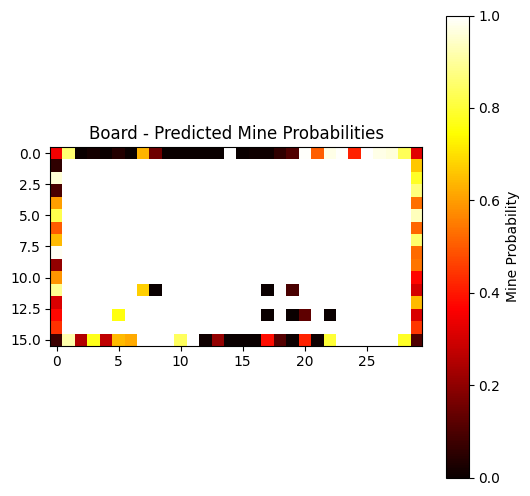

In [7]:
def test_model_on_board(model, board):
    board = np.expand_dims(board, axis=0)
    prediction = model.predict(board)
    predicted_probabilities = prediction[0]
    
    # Visualize the prediction using a heatmap
    plt.figure(figsize=(6, 6))
    plt.title(f"Board - Predicted Mine Probabilities")
    plt.imshow(predicted_probabilities, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Mine Probability')
    plt.show()

test_model_on_board(model, X[0])

In [8]:
print(X[0])
print(y[0])

[[[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [-1]
  [ 0]
  [-1]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [-1]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]]

 [[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 9]
  [ 9]
  [ 9]
  [ 9]
  [ 9]]

 [[ 0]
  [ 0]
  [-1]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [-1]
  [-1]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [-1]
  [ 0]
  [ 0]
  [ 0]
  [ 0